# Importing libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#ensure charts created don't need to be called 
%matplotlib inline

# Importing Data

In [3]:
#creating a path variable for orginal data
path = r'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [4]:
df_airbnb = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_new_columns.csv'), index_col = False)

In [6]:
df_airbnb.head(20)

,Unnamed: 0,id,host_id,host_since,host_is_superhost,location,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,entire_home_apt,Rating category,average_ratings
0,0,607435380788232654,430149575,2021-11-02,False,North Park Hill,39.760390,-104.929680,Private room in home,Private room,...,2.50,3.00,3.50,4.00,3.00,False,0.11,False,Low rating,3.083333
1,1,545714833502855511,169214047,2018-01-22,False,Hale,39.727850,-104.937830,Entire rental unit,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,False,0.00,True,No ratings,0.000000
2,2,52429527,107279139,2016-12-14,True,Five Points,39.758520,-104.988460,Entire townhouse,Entire home/apt,...,4.62,4.78,4.78,4.93,4.59,False,2.52,True,High rating,4.795000
3,3,632494576047532593,416194740,2021-07-31,True,West Colfax,39.736019,-105.050720,Entire townhouse,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000
4,4,687768125161080215,133612752,2017-06-05,False,Sunnyside,39.771430,-105.020280,Entire home,Entire home/apt,...,5.00,5.00,5.00,4.92,4.92,False,0.99,True,High rating,4.986667
5,5,43316442,299373263,2019-10-01,False,Jefferson Park,39.748030,-105.022430,Entire townhouse,Entire home/apt,...,4.86,5.00,5.00,5.00,4.75,False,0.67,True,High rating,4.963333
6,6,53892390,436546995,2021-12-18,True,Chaffee Park,39.791370,-105.023540,Entire guesthouse,Entire home/apt,...,4.97,4.98,5.00,4.88,4.93,False,2.61,True,High rating,4.966667
7,7,842293747258462739,456393682,2022-04-27,True,Five Points,39.756066,-104.982419,Entire home,Entire home/apt,...,4.88,5.00,4.81,4.94,4.56,True,2.14,True,High rating,4.886667
8,8,717942620254550220,110328442,2017-01-07,False,Sunnyside,39.777902,-105.023757,Entire home,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000
9,9,991710271661703752,263502162,2019-05-22,False,West Colfax,39.739604,-105.046350,Entire rental unit,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000


# Regression for price per night and average review

In [8]:
df_airbnb.drop(columns = ['Unnamed: 0'], inplace = True)

In [14]:
#checking for null values 
df_airbnb.isnull().sum()

id                               0
host_id                          0
host_since                       0
host_is_superhost                0
location                         0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
guest_count                      0
bathrooms                        0
beds                             0
price                           38
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
first_review                   709
last_review                    709
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_commun

In [15]:
#removing null values from price column 
df_airbnb = df_airbnb.dropna(subset = ['price'], axis = 0)

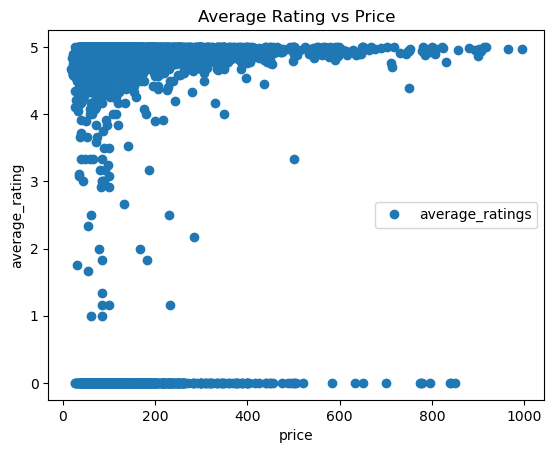

In [45]:
#hypothesis is that this will not be lienar - the lower and higher end of pricing will have higher reviews and the average reveiw will dip in the middle tier price range 
#creating a scatterplot using matplotlib to visualize how the variables plot against each other

df_airbnb.plot(x = 'price', y= 'average_ratings',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Rating vs Price')  
plt.xlabel('price')  
plt.ylabel('average_rating')  
plt.show()

In [46]:
# reshape the variables into NumPy arrays and put them into sepearte objects 
X = df_airbnb['price'].values.reshape(-1,1)
y = df_airbnb['average_ratings'].values.reshape(-1,1)

In [47]:
#splitting data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
#creating a regression object that will be fit onto the training model 
regression = LinearRegression()

In [49]:
#fitting the regression object onto the training set 
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
#predict the values of y using x 
y_predicted = regression.predict(X_test)

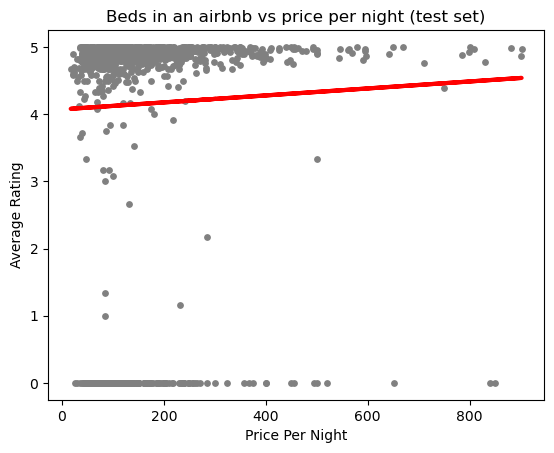

In [51]:
#creating a plot that shows the regression line from the model on the test set 
plot_test = plt 
plot_test.scatter(X_test, y_test, color ='gray', s = 15) 
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Beds in an airbnb vs price per night (test set)') 
plot_test.xlabel('Price Per Night')
plot_test.ylabel('Average Rating')
plot_test.show()

In [52]:
# create objects that contain the model summary statistics 
rmse = mean_squared_error(y_test, y_predicted) #mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score 

In [53]:
#printing summary statistics to evaluate model perfomance 
print('Slope:' ,regression.coef_)
print('Mean Squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00051927]]
Mean Squared error:  2.9941617816939394
R2 score:  0.0004882001735292407


In [54]:
y_predicted

array([[4.2251856 ],
       [4.10108037],
       [4.33007789],
       ...,
       [4.19714509],
       [4.13690992],
       [4.19454875]])

In [55]:
#creating a dataframe to compare predicted and actual values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.895000,4.225186
1,4.915000,4.101080
2,0.000000,4.330078
3,5.000000,4.156123
4,5.000000,4.119774
5,5.000000,4.108869
6,5.000000,4.234532
7,4.913333,4.091214
8,4.905000,4.143660
9,4.861667,4.137429


# Comparing regression set and training set

In [56]:
#predicting X_train
y_predicted_train = regression.predict(X_train) 

In [57]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00051927]]
Mean squared error:  3.0206895400854834
R2 score:  0.0012860906479748024


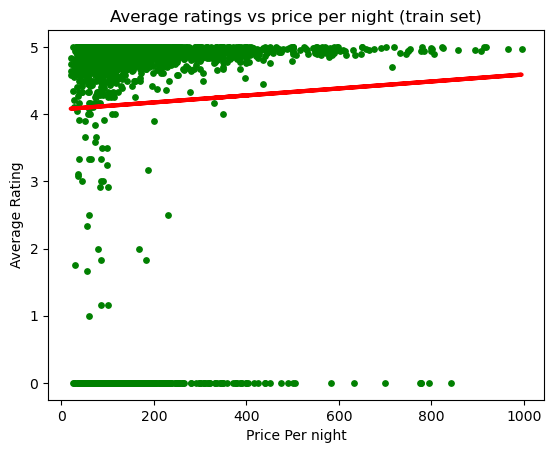

In [59]:
#visualizing the training set results
plot_test = plt 
plot_test.scatter(X_train, y_train, color = 'green', s= 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth = 3)
plot_test.title('Average ratings vs price per night (train set)') 
plot_test.xlabel('Price Per night')
plot_test.ylabel('Average Rating')
plot_test.show()

# Cluster analysis

In [34]:
#creating a subset with only the columns I want to conduct my visual analysis on

columns_to_keep = ['guest_count', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights','availability_30', 'availability_60', 'availability_90', 'reviews_per_month', 'average_ratings']
df_bnb_selected = df_airbnb[columns_to_keep]

In [35]:
num_cl = range(1,10) # this defines the range of potential amount of clusters in the data 
kmeans = [KMeans(n_clusters=i) for i in num_cl] # this defines k-means clusters in the range its assigned

In [36]:
#creating a score that represents a rate of variation for each cluster option
score = [kmeans[i].fit(df_bnb_selected).score(df_bnb_selected) for i in range(len(kmeans))]
score

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-1011988223.3086936,
 -170692445.40638885,
 -96232208.86003987,
 -73343926.5082525,
 -60517582.009678505,
 -48660844.0611082,
 -42075257.73663734,
 -36127390.45180036,
 -32027416.71505428]

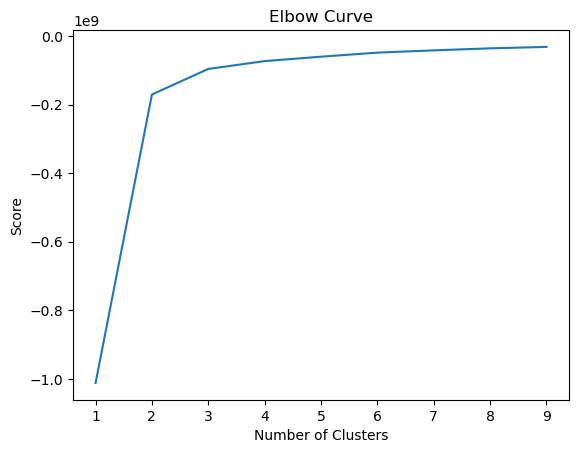

In [37]:
#plotting the elbow curve 
plt.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.show()

In [38]:
#creating a KMeans object
kmeans = KMeans(n_clusters = 3)

In [39]:
#fitting the KMeans object to the data 
kmeans.fit(df_bnb_selected)

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
df_bnb_selected['clusters'] = kmeans.fit_predict(df_bnb_selected)

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_72431/2420894596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bnb_selected['clusters'] = kmeans.fit_predict(df_bnb_selected)


In [41]:
df_bnb_selected.head()

,guest_count,bathrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,reviews_per_month,average_ratings,clusters
0,1,1.0,1.0,35.0,30,365,30,60,90,0.11,3.083333,0
1,6,2.0,3.0,149.0,30,365,29,59,89,0.00,0.000000,0
2,8,2.5,4.0,190.0,1,365,4,21,51,2.52,4.795000,0
3,5,2.5,2.0,87.0,29,365,0,0,0,0.00,0.000000,0
4,3,1.0,2.0,300.0,29,1125,0,0,27,0.99,4.986667,1


In [42]:
df_bnb_selected['clusters'].value_counts()

clusters
2    1780
0    1560
1    1438
Name: count, dtype: int64

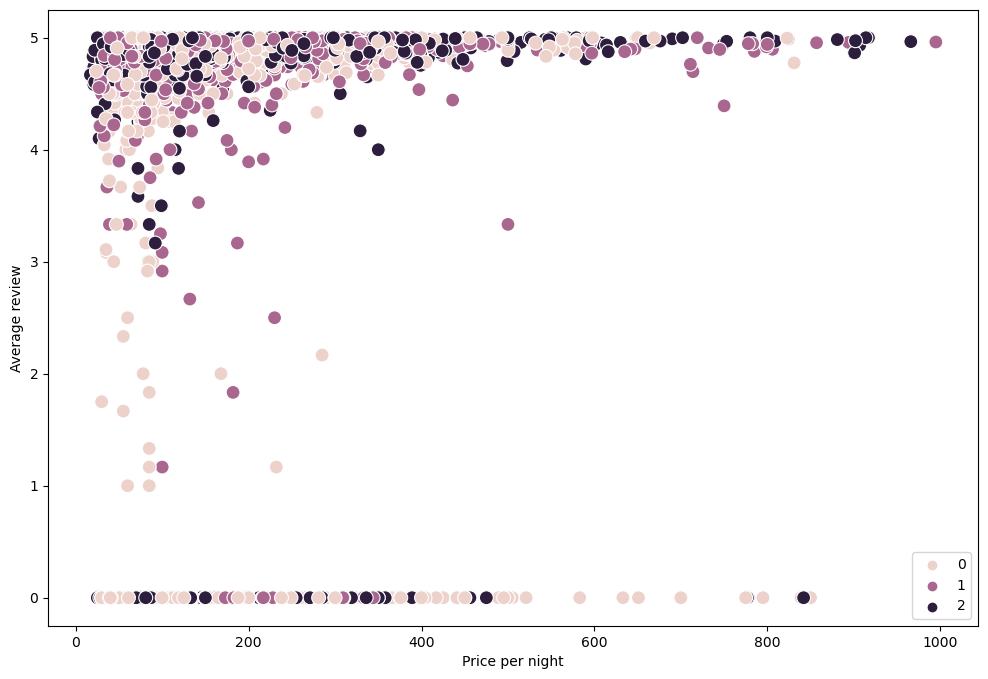

In [43]:
#plotting the clusters for price and average_ratings
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_bnb_selected['price'], y=df_bnb_selected['average_ratings'], hue=kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Price per night')
plt.ylabel('Average review')
plt.show()

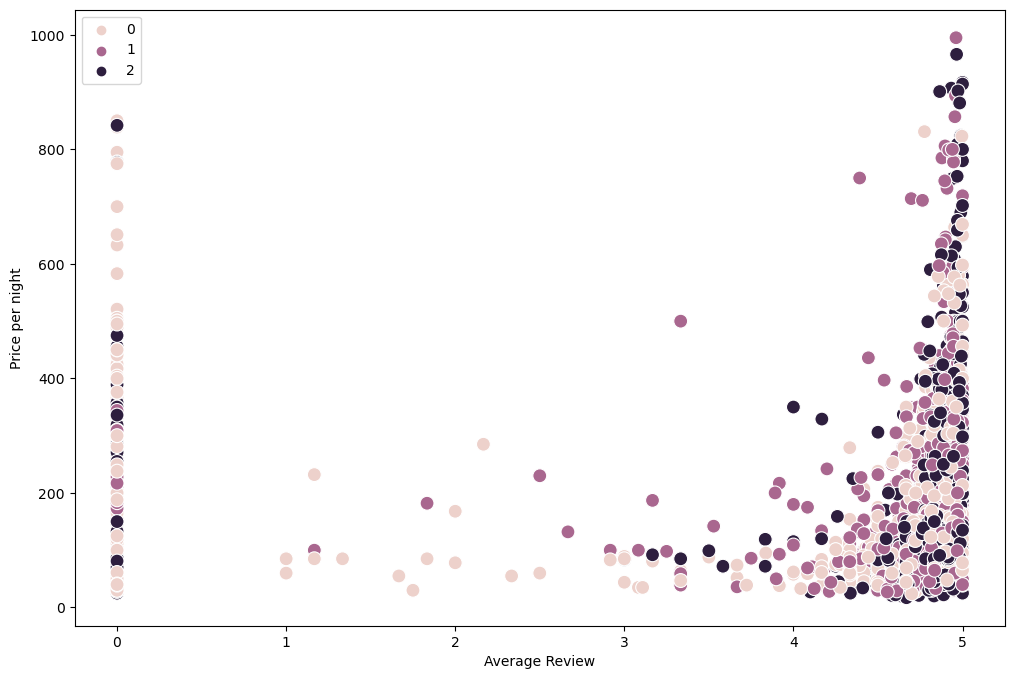

In [44]:
#plotting the clusters for price and average_ratings
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_bnb_selected['average_ratings'], y=df_bnb_selected['price'], hue=kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Review')
plt.ylabel('Price per night')
plt.show()